Best Model : 16 bins

In [1]:

import numpy 
import matplotlib.pyplot as plt
import pandas 
import math
from matplotlib import pyplot
from pandas import DataFrame

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import array

from keras.layers import Input ,Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Reshape,Conv2D
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed

from keras.utils import np_utils


import numpy as np
import cv2
from keras.preprocessing.image import img_to_array












import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator



from keras import models

from matplotlib import pyplot
from numpy import array
from pandas import DataFrame
import numpy as np

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot



from keras import backend as K
from sklearn.metrics import mean_absolute_error




from keras import optimizers
from keras.layers import Bidirectional


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
results_rmse = []
results_mae = []

In [3]:
def train_bin_models(num_bins):
    numpy.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))

    # we group by video so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than time_steps datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])

            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)









    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by video so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than time_steps datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)


    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)
    trainX=trainX.reshape(-1,19,num_bins)
    print(numpy.max(trainX))


    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)
    testX=testX.reshape(-1,19,num_bins)
    print(numpy.max(testX))






    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins)
    print(testX.shape,testY.shape)




    print(trainX.shape,trainY.shape)
    print(testX.shape,testY.shape)
    #print(valX.shape,valY.shape)








    adam1 = optimizers.Adam(lr=0.001)
    sgd1 = optimizers.SGD(lr=0.005) 

    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins))) #100
    model.add(Dense(1))
    model.add(Dropout(0.1))


    model.compile(loss='mse', optimizer=sgd1, metrics=['mse'])
    #model.compile(loss='mse', optimizer=sgd1,metrics=['mean_squared_error'])
    history =model.fit(trainX, trainY, nb_epoch=500, batch_size=20, verbose=2,shuffle=True) #500 batch =2     



    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))




    from keras import backend as K

    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    # calculate root mean squared error
    
    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))


    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))


    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))


    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        
    bin_name = str(num_bins)+"bin"
    results_rmse.append(rmse)
    results_mae.append(mae)

In [4]:
for i in [8,10,16,32,64,120]:
    train_bin_models(i)

117
19
(114, 19, 8) (114, 1)
55
19
(52, 19, 8) (52, 1)
175000.0
169205.0
(114, 19, 8) (114, 1)
(52, 19, 8) (52, 1)
(114, 19, 8) (114, 1)
(52, 19, 8) (52, 1)
Build model...


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 1s - loss: 3.3209 - mean_squared_error: 3.3209
Epoch 2/500
 - 0s - loss: 2.6665 - mean_squared_error: 2.6665
Epoch 3/500
 - 0s - loss: 2.2655 - mean_squared_error: 2.2655
Epoch 4/500
 - 0s - loss: 1.8307 - mean_squared_error: 1.8307
Epoch 5/500
 - 0s - loss: 1.6716 - mean_squared_error: 1.6716
Epoch 6/500
 - 0s - loss: 1.4189 - mean_squared_error: 1.4189
Epoch 7/500
 - 0s - loss: 1.6089 - mean_squared_error: 1.6089
Epoch 8/500
 - 0s - loss: 1.2323 - mean_squared_error: 1.2323
Epoch 9/500
 - 0s - loss: 1.2983 - mean_squared_error: 1.2983
Epoch 10/500
 - 0s - loss: 1.3501 - mean_squared_error: 1.3501
Epoch 11/500
 - 0s - loss: 1.2639 - mean_squared_error: 1.2639
Epoch 12/500
 - 0s - loss: 1.3182 - mean_squared_error: 1.3182
Epoch 13/500
 - 0s - loss: 1.2512 - mean_squared_error: 1.2512
Epoch 14/500
 - 0s - loss: 1.1154 - mean_squared_error: 1.1154
Epoch 15/500
 - 0s - loss: 1.1433 - mean_squared_error: 1.1433
Epoch 16/500
 - 0s - loss: 1.2194 - mean_squared_error: 1.2194
E

Epoch 131/500
 - 0s - loss: 1.2252 - mean_squared_error: 1.2252
Epoch 132/500
 - 0s - loss: 1.2082 - mean_squared_error: 1.2082
Epoch 133/500
 - 0s - loss: 1.1246 - mean_squared_error: 1.1246
Epoch 134/500
 - 0s - loss: 1.2621 - mean_squared_error: 1.2621
Epoch 135/500
 - 0s - loss: 1.0543 - mean_squared_error: 1.0543
Epoch 136/500
 - 0s - loss: 1.2993 - mean_squared_error: 1.2993
Epoch 137/500
 - 0s - loss: 1.0796 - mean_squared_error: 1.0796
Epoch 138/500
 - 0s - loss: 1.1753 - mean_squared_error: 1.1753
Epoch 139/500
 - 0s - loss: 1.2230 - mean_squared_error: 1.2230
Epoch 140/500
 - 0s - loss: 1.3378 - mean_squared_error: 1.3378
Epoch 141/500
 - 0s - loss: 1.2484 - mean_squared_error: 1.2484
Epoch 142/500
 - 0s - loss: 1.3187 - mean_squared_error: 1.3187
Epoch 143/500
 - 0s - loss: 1.3025 - mean_squared_error: 1.3025
Epoch 144/500
 - 0s - loss: 1.1422 - mean_squared_error: 1.1422
Epoch 145/500
 - 0s - loss: 1.1175 - mean_squared_error: 1.1175
Epoch 146/500
 - 0s - loss: 1.3469 - mea

 - 0s - loss: 1.2708 - mean_squared_error: 1.2708
Epoch 260/500
 - 0s - loss: 1.2204 - mean_squared_error: 1.2204
Epoch 261/500
 - 0s - loss: 1.3910 - mean_squared_error: 1.3910
Epoch 262/500
 - 0s - loss: 1.2782 - mean_squared_error: 1.2782
Epoch 263/500
 - 0s - loss: 0.9910 - mean_squared_error: 0.9910
Epoch 264/500
 - 0s - loss: 0.9751 - mean_squared_error: 0.9751
Epoch 265/500
 - 0s - loss: 1.1007 - mean_squared_error: 1.1007
Epoch 266/500
 - 0s - loss: 1.2901 - mean_squared_error: 1.2901
Epoch 267/500
 - 0s - loss: 1.0273 - mean_squared_error: 1.0273
Epoch 268/500
 - 0s - loss: 1.1862 - mean_squared_error: 1.1862
Epoch 269/500
 - 0s - loss: 1.1430 - mean_squared_error: 1.1430
Epoch 270/500
 - 0s - loss: 0.9388 - mean_squared_error: 0.9388
Epoch 271/500
 - 0s - loss: 1.2387 - mean_squared_error: 1.2387
Epoch 272/500
 - 0s - loss: 1.1894 - mean_squared_error: 1.1894
Epoch 273/500
 - 0s - loss: 1.2487 - mean_squared_error: 1.2487
Epoch 274/500
 - 0s - loss: 1.1056 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 1.0825 - mean_squared_error: 1.0825
Epoch 389/500
 - 0s - loss: 1.1375 - mean_squared_error: 1.1375
Epoch 390/500
 - 0s - loss: 1.0819 - mean_squared_error: 1.0819
Epoch 391/500
 - 0s - loss: 0.9603 - mean_squared_error: 0.9603
Epoch 392/500
 - 0s - loss: 1.0322 - mean_squared_error: 1.0322
Epoch 393/500
 - 0s - loss: 1.2656 - mean_squared_error: 1.2656
Epoch 394/500
 - 0s - loss: 1.2352 - mean_squared_error: 1.2352
Epoch 395/500
 - 0s - loss: 1.2444 - mean_squared_error: 1.2444
Epoch 396/500
 - 0s - loss: 1.0847 - mean_squared_error: 1.0847
Epoch 397/500
 - 0s - loss: 1.1180 - mean_squared_error: 1.1180
Epoch 398/500
 - 0s - loss: 0.9276 - mean_squared_error: 0.9276
Epoch 399/500
 - 0s - loss: 1.0936 - mean_squared_error: 1.0936
Epoch 400/500
 - 0s - loss: 1.0398 - mean_squared_error: 1.0398
Epoch 401/500
 - 0s - loss: 1.0461 - mean_squared_error: 1.0461
Epoch 402/500
 - 0s - loss: 1.1671 - mean_squared_error: 1.1671
Epoch 403/500
 - 0s - loss: 1.1672 - mea

19
(52, 19, 10) (52, 1)
175000.0
163753.0
(114, 19, 10) (114, 1)
(52, 19, 10) (52, 1)
(114, 19, 10) (114, 1)
(52, 19, 10) (52, 1)
Build model...
Epoch 1/500
 - 1s - loss: 3.2791 - mean_squared_error: 3.2791
Epoch 2/500
 - 0s - loss: 2.6512 - mean_squared_error: 2.6512
Epoch 3/500
 - 0s - loss: 2.2755 - mean_squared_error: 2.2755
Epoch 4/500
 - 0s - loss: 1.8511 - mean_squared_error: 1.8511
Epoch 5/500
 - 0s - loss: 1.6910 - mean_squared_error: 1.6910
Epoch 6/500
 - 0s - loss: 1.4405 - mean_squared_error: 1.4405
Epoch 7/500
 - 0s - loss: 1.6208 - mean_squared_error: 1.6208
Epoch 8/500
 - 0s - loss: 1.2497 - mean_squared_error: 1.2497
Epoch 9/500
 - 0s - loss: 1.3125 - mean_squared_error: 1.3125
Epoch 10/500
 - 0s - loss: 1.3602 - mean_squared_error: 1.3602
Epoch 11/500
 - 0s - loss: 1.2736 - mean_squared_error: 1.2736
Epoch 12/500
 - 0s - loss: 1.3263 - mean_squared_error: 1.3263
Epoch 13/500
 - 0s - loss: 1.2629 - mean_squared_error: 1.2629
Epoch 14/500
 - 0s - loss: 1.1275 - mean_squa

Epoch 129/500
 - 0s - loss: 1.0127 - mean_squared_error: 1.0127
Epoch 130/500
 - 0s - loss: 1.0963 - mean_squared_error: 1.0963
Epoch 131/500
 - 0s - loss: 1.2435 - mean_squared_error: 1.2435
Epoch 132/500
 - 0s - loss: 1.2310 - mean_squared_error: 1.2310
Epoch 133/500
 - 0s - loss: 1.1492 - mean_squared_error: 1.1492
Epoch 134/500
 - 0s - loss: 1.2797 - mean_squared_error: 1.2797
Epoch 135/500
 - 0s - loss: 1.0758 - mean_squared_error: 1.0758
Epoch 136/500
 - 0s - loss: 1.3183 - mean_squared_error: 1.3183
Epoch 137/500
 - 0s - loss: 1.0958 - mean_squared_error: 1.0958
Epoch 138/500
 - 0s - loss: 1.1944 - mean_squared_error: 1.1944
Epoch 139/500
 - 0s - loss: 1.2429 - mean_squared_error: 1.2429
Epoch 140/500
 - 0s - loss: 1.3566 - mean_squared_error: 1.3566
Epoch 141/500
 - 0s - loss: 1.2697 - mean_squared_error: 1.2697
Epoch 142/500
 - 0s - loss: 1.3385 - mean_squared_error: 1.3385
Epoch 143/500
 - 0s - loss: 1.3203 - mean_squared_error: 1.3203
Epoch 144/500
 - 0s - loss: 1.1633 - mea

 - 0s - loss: 1.1690 - mean_squared_error: 1.1690
Epoch 258/500
 - 0s - loss: 1.1007 - mean_squared_error: 1.1007
Epoch 259/500
 - 0s - loss: 1.2938 - mean_squared_error: 1.2938
Epoch 260/500
 - 0s - loss: 1.2510 - mean_squared_error: 1.2510
Epoch 261/500
 - 0s - loss: 1.4111 - mean_squared_error: 1.4111
Epoch 262/500
 - 0s - loss: 1.3103 - mean_squared_error: 1.3103
Epoch 263/500
 - 0s - loss: 1.0180 - mean_squared_error: 1.0180
Epoch 264/500
 - 0s - loss: 1.0078 - mean_squared_error: 1.0078
Epoch 265/500
 - 0s - loss: 1.1278 - mean_squared_error: 1.1278
Epoch 266/500
 - 0s - loss: 1.3161 - mean_squared_error: 1.3161
Epoch 267/500
 - 0s - loss: 1.0542 - mean_squared_error: 1.0542
Epoch 268/500
 - 0s - loss: 1.2148 - mean_squared_error: 1.2148
Epoch 269/500
 - 0s - loss: 1.1716 - mean_squared_error: 1.1716
Epoch 270/500
 - 0s - loss: 0.9694 - mean_squared_error: 0.9694
Epoch 271/500
 - 0s - loss: 1.2694 - mean_squared_error: 1.2694
Epoch 272/500
 - 0s - loss: 1.2139 - mean_squared_erro

Epoch 386/500
 - 0s - loss: 1.0058 - mean_squared_error: 1.0058
Epoch 387/500
 - 0s - loss: 1.2103 - mean_squared_error: 1.2103
Epoch 388/500
 - 0s - loss: 1.1223 - mean_squared_error: 1.1223
Epoch 389/500
 - 0s - loss: 1.1788 - mean_squared_error: 1.1788
Epoch 390/500
 - 0s - loss: 1.0975 - mean_squared_error: 1.0975
Epoch 391/500
 - 0s - loss: 0.9918 - mean_squared_error: 0.9918
Epoch 392/500
 - 0s - loss: 1.0659 - mean_squared_error: 1.0659
Epoch 393/500
 - 0s - loss: 1.3032 - mean_squared_error: 1.3032
Epoch 394/500
 - 0s - loss: 1.2600 - mean_squared_error: 1.2600
Epoch 395/500
 - 0s - loss: 1.2756 - mean_squared_error: 1.2756
Epoch 396/500
 - 0s - loss: 1.1249 - mean_squared_error: 1.1249
Epoch 397/500
 - 0s - loss: 1.1407 - mean_squared_error: 1.1407
Epoch 398/500
 - 0s - loss: 0.9513 - mean_squared_error: 0.9513
Epoch 399/500
 - 0s - loss: 1.1374 - mean_squared_error: 1.1374
Epoch 400/500
 - 0s - loss: 1.0711 - mean_squared_error: 1.0711
Epoch 401/500
 - 0s - loss: 1.0705 - mea

117
19
(114, 19, 16) (114, 1)
55
19
(52, 19, 16) (52, 1)
174999.0
157653.0
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
Build model...
Epoch 1/500
 - 1s - loss: 3.2207 - mean_squared_error: 3.2207
Epoch 2/500
 - 0s - loss: 2.6435 - mean_squared_error: 2.6435
Epoch 3/500
 - 0s - loss: 2.2863 - mean_squared_error: 2.2863
Epoch 4/500
 - 0s - loss: 1.8722 - mean_squared_error: 1.8722
Epoch 5/500
 - 0s - loss: 1.7193 - mean_squared_error: 1.7193
Epoch 6/500
 - 0s - loss: 1.4602 - mean_squared_error: 1.4602
Epoch 7/500
 - 0s - loss: 1.6364 - mean_squared_error: 1.6364
Epoch 8/500
 - 0s - loss: 1.2655 - mean_squared_error: 1.2655
Epoch 9/500
 - 0s - loss: 1.3203 - mean_squared_error: 1.3203
Epoch 10/500
 - 0s - loss: 1.3635 - mean_squared_error: 1.3635
Epoch 11/500
 - 0s - loss: 1.2775 - mean_squared_error: 1.2775
Epoch 12/500
 - 0s - loss: 1.3327 - mean_squared_error: 1.3327
Epoch 13/500
 - 0s - loss: 1.2623 - mean_squared_error: 1.2623
Epoch 14/500

Epoch 128/500
 - 0s - loss: 1.2656 - mean_squared_error: 1.2656
Epoch 129/500
 - 0s - loss: 1.0196 - mean_squared_error: 1.0196
Epoch 130/500
 - 0s - loss: 1.1000 - mean_squared_error: 1.1000
Epoch 131/500
 - 0s - loss: 1.2490 - mean_squared_error: 1.2490
Epoch 132/500
 - 0s - loss: 1.2365 - mean_squared_error: 1.2365
Epoch 133/500
 - 0s - loss: 1.1553 - mean_squared_error: 1.1553
Epoch 134/500
 - 0s - loss: 1.2845 - mean_squared_error: 1.2845
Epoch 135/500
 - 0s - loss: 1.0836 - mean_squared_error: 1.0836
Epoch 136/500
 - 0s - loss: 1.3284 - mean_squared_error: 1.3284
Epoch 137/500
 - 0s - loss: 1.0988 - mean_squared_error: 1.0988
Epoch 138/500
 - 0s - loss: 1.2013 - mean_squared_error: 1.2013
Epoch 139/500
 - 0s - loss: 1.2476 - mean_squared_error: 1.2476
Epoch 140/500
 - 0s - loss: 1.3626 - mean_squared_error: 1.3626
Epoch 141/500
 - 0s - loss: 1.2781 - mean_squared_error: 1.2781
Epoch 142/500
 - 0s - loss: 1.3487 - mean_squared_error: 1.3487
Epoch 143/500
 - 0s - loss: 1.3246 - mea

 - 0s - loss: 1.2158 - mean_squared_error: 1.2158
Epoch 257/500
 - 0s - loss: 1.1867 - mean_squared_error: 1.1867
Epoch 258/500
 - 0s - loss: 1.1096 - mean_squared_error: 1.1096
Epoch 259/500
 - 0s - loss: 1.3080 - mean_squared_error: 1.3080
Epoch 260/500
 - 0s - loss: 1.2767 - mean_squared_error: 1.2767
Epoch 261/500
 - 0s - loss: 1.4344 - mean_squared_error: 1.4344
Epoch 262/500
 - 0s - loss: 1.3346 - mean_squared_error: 1.3346
Epoch 263/500
 - 0s - loss: 1.0386 - mean_squared_error: 1.0386
Epoch 264/500
 - 0s - loss: 1.0291 - mean_squared_error: 1.0291
Epoch 265/500
 - 0s - loss: 1.1426 - mean_squared_error: 1.1426
Epoch 266/500
 - 0s - loss: 1.3348 - mean_squared_error: 1.3348
Epoch 267/500
 - 0s - loss: 1.0728 - mean_squared_error: 1.0728
Epoch 268/500
 - 0s - loss: 1.2399 - mean_squared_error: 1.2399
Epoch 269/500
 - 0s - loss: 1.1884 - mean_squared_error: 1.1884
Epoch 270/500
 - 0s - loss: 0.9849 - mean_squared_error: 0.9849
Epoch 271/500
 - 0s - loss: 1.2937 - mean_squared_erro

Epoch 385/500
 - 0s - loss: 0.9581 - mean_squared_error: 0.9581
Epoch 386/500
 - 0s - loss: 1.0370 - mean_squared_error: 1.0370
Epoch 387/500
 - 0s - loss: 1.2253 - mean_squared_error: 1.2253
Epoch 388/500
 - 0s - loss: 1.1510 - mean_squared_error: 1.1510
Epoch 389/500
 - 0s - loss: 1.1951 - mean_squared_error: 1.1951
Epoch 390/500
 - 0s - loss: 1.1039 - mean_squared_error: 1.1039
Epoch 391/500
 - 0s - loss: 0.9996 - mean_squared_error: 0.9996
Epoch 392/500
 - 0s - loss: 1.1007 - mean_squared_error: 1.1007
Epoch 393/500
 - 0s - loss: 1.3108 - mean_squared_error: 1.3108
Epoch 394/500
 - 0s - loss: 1.2806 - mean_squared_error: 1.2806
Epoch 395/500
 - 0s - loss: 1.2923 - mean_squared_error: 1.2923
Epoch 396/500
 - 0s - loss: 1.1562 - mean_squared_error: 1.1562
Epoch 397/500
 - 0s - loss: 1.1506 - mean_squared_error: 1.1506
Epoch 398/500
 - 0s - loss: 0.9783 - mean_squared_error: 0.9783
Epoch 399/500
 - 0s - loss: 1.1470 - mean_squared_error: 1.1470
Epoch 400/500
 - 0s - loss: 1.0877 - mea

19
(114, 19, 32) (114, 1)
55
19
(52, 19, 32) (52, 1)
174998.0
128798.0
(114, 19, 32) (114, 1)
(52, 19, 32) (52, 1)
(114, 19, 32) (114, 1)
(52, 19, 32) (52, 1)
Build model...
Epoch 1/500
 - 1s - loss: 3.0839 - mean_squared_error: 3.0839
Epoch 2/500
 - 0s - loss: 2.5545 - mean_squared_error: 2.5545
Epoch 3/500
 - 0s - loss: 2.2369 - mean_squared_error: 2.2369
Epoch 4/500
 - 0s - loss: 1.8256 - mean_squared_error: 1.8256
Epoch 5/500
 - 0s - loss: 1.6843 - mean_squared_error: 1.6843
Epoch 6/500
 - 0s - loss: 1.4318 - mean_squared_error: 1.4318
Epoch 7/500
 - 0s - loss: 1.6162 - mean_squared_error: 1.6162
Epoch 8/500
 - 0s - loss: 1.2454 - mean_squared_error: 1.2454
Epoch 9/500
 - 0s - loss: 1.3080 - mean_squared_error: 1.3080
Epoch 10/500
 - 0s - loss: 1.3497 - mean_squared_error: 1.3497
Epoch 11/500
 - 0s - loss: 1.2640 - mean_squared_error: 1.2640
Epoch 12/500
 - 0s - loss: 1.3190 - mean_squared_error: 1.3190
Epoch 13/500
 - 0s - loss: 1.2519 - mean_squared_error: 1.2519
Epoch 14/500
 - 

Epoch 128/500
 - 0s - loss: 1.2651 - mean_squared_error: 1.2651
Epoch 129/500
 - 0s - loss: 1.0204 - mean_squared_error: 1.0204
Epoch 130/500
 - 0s - loss: 1.1010 - mean_squared_error: 1.1010
Epoch 131/500
 - 0s - loss: 1.2518 - mean_squared_error: 1.2518
Epoch 132/500
 - 0s - loss: 1.2412 - mean_squared_error: 1.2412
Epoch 133/500
 - 0s - loss: 1.1596 - mean_squared_error: 1.1596
Epoch 134/500
 - 0s - loss: 1.2858 - mean_squared_error: 1.2858
Epoch 135/500
 - 0s - loss: 1.0842 - mean_squared_error: 1.0842
Epoch 136/500
 - 0s - loss: 1.3341 - mean_squared_error: 1.3341
Epoch 137/500
 - 0s - loss: 1.0989 - mean_squared_error: 1.0989
Epoch 138/500
 - 0s - loss: 1.2031 - mean_squared_error: 1.2031
Epoch 139/500
 - 0s - loss: 1.2496 - mean_squared_error: 1.2496
Epoch 140/500
 - 0s - loss: 1.3643 - mean_squared_error: 1.3643
Epoch 141/500
 - 0s - loss: 1.2817 - mean_squared_error: 1.2817
Epoch 142/500
 - 0s - loss: 1.3500 - mean_squared_error: 1.3500
Epoch 143/500
 - 0s - loss: 1.3252 - mea

 - 0s - loss: 1.2227 - mean_squared_error: 1.2227
Epoch 257/500
 - 0s - loss: 1.1960 - mean_squared_error: 1.1960
Epoch 258/500
 - 0s - loss: 1.1164 - mean_squared_error: 1.1164
Epoch 259/500
 - 0s - loss: 1.3141 - mean_squared_error: 1.3141
Epoch 260/500
 - 0s - loss: 1.2888 - mean_squared_error: 1.2888
Epoch 261/500
 - 0s - loss: 1.4436 - mean_squared_error: 1.4436
Epoch 262/500
 - 0s - loss: 1.3470 - mean_squared_error: 1.3470
Epoch 263/500
 - 0s - loss: 1.0496 - mean_squared_error: 1.0496
Epoch 264/500
 - 0s - loss: 1.0418 - mean_squared_error: 1.0418
Epoch 265/500
 - 0s - loss: 1.1518 - mean_squared_error: 1.1518
Epoch 266/500
 - 0s - loss: 1.3459 - mean_squared_error: 1.3459
Epoch 267/500
 - 0s - loss: 1.0850 - mean_squared_error: 1.0850
Epoch 268/500
 - 0s - loss: 1.2492 - mean_squared_error: 1.2492
Epoch 269/500
 - 0s - loss: 1.1995 - mean_squared_error: 1.1995
Epoch 270/500
 - 0s - loss: 0.9984 - mean_squared_error: 0.9984
Epoch 271/500
 - 0s - loss: 1.3051 - mean_squared_erro

Epoch 385/500
 - 0s - loss: 0.9830 - mean_squared_error: 0.9830
Epoch 386/500
 - 0s - loss: 1.0633 - mean_squared_error: 1.0633
Epoch 387/500
 - 0s - loss: 1.2452 - mean_squared_error: 1.2452
Epoch 388/500
 - 0s - loss: 1.1804 - mean_squared_error: 1.1804
Epoch 389/500
 - 0s - loss: 1.2133 - mean_squared_error: 1.2133
Epoch 390/500
 - 0s - loss: 1.1162 - mean_squared_error: 1.1162
Epoch 391/500
 - 0s - loss: 1.0231 - mean_squared_error: 1.0231
Epoch 392/500
 - 0s - loss: 1.1301 - mean_squared_error: 1.1301
Epoch 393/500
 - 0s - loss: 1.3225 - mean_squared_error: 1.3225
Epoch 394/500
 - 0s - loss: 1.3006 - mean_squared_error: 1.3006
Epoch 395/500
 - 0s - loss: 1.3133 - mean_squared_error: 1.3133
Epoch 396/500
 - 0s - loss: 1.1801 - mean_squared_error: 1.1801
Epoch 397/500
 - 0s - loss: 1.1677 - mean_squared_error: 1.1677
Epoch 398/500
 - 0s - loss: 1.0094 - mean_squared_error: 1.0094
Epoch 399/500
 - 0s - loss: 1.1705 - mean_squared_error: 1.1705
Epoch 400/500
 - 0s - loss: 1.1055 - mea

19
(114, 19, 64) (114, 1)
55
19
(52, 19, 64) (52, 1)
174992.0
105491.0
(114, 19, 64) (114, 1)
(52, 19, 64) (52, 1)
(114, 19, 64) (114, 1)
(52, 19, 64) (52, 1)
Build model...
Epoch 1/500
 - 1s - loss: 3.0850 - mean_squared_error: 3.0850
Epoch 2/500
 - 0s - loss: 2.5779 - mean_squared_error: 2.5779
Epoch 3/500
 - 0s - loss: 2.2516 - mean_squared_error: 2.2516
Epoch 4/500
 - 0s - loss: 1.8521 - mean_squared_error: 1.8521
Epoch 5/500
 - 0s - loss: 1.7089 - mean_squared_error: 1.7089
Epoch 6/500
 - 0s - loss: 1.4564 - mean_squared_error: 1.4564
Epoch 7/500
 - 0s - loss: 1.6338 - mean_squared_error: 1.6338
Epoch 8/500
 - 0s - loss: 1.2627 - mean_squared_error: 1.2627
Epoch 9/500
 - 0s - loss: 1.3172 - mean_squared_error: 1.3172
Epoch 10/500
 - 0s - loss: 1.3634 - mean_squared_error: 1.3634
Epoch 11/500
 - 0s - loss: 1.2753 - mean_squared_error: 1.2753
Epoch 12/500
 - 0s - loss: 1.3311 - mean_squared_error: 1.3311
Epoch 13/500
 - 0s - loss: 1.2610 - mean_squared_error: 1.2610
Epoch 14/500
 - 

Epoch 128/500
 - 0s - loss: 1.2849 - mean_squared_error: 1.2849
Epoch 129/500
 - 0s - loss: 1.0372 - mean_squared_error: 1.0372
Epoch 130/500
 - 0s - loss: 1.1150 - mean_squared_error: 1.1150
Epoch 131/500
 - 0s - loss: 1.2699 - mean_squared_error: 1.2699
Epoch 132/500
 - 0s - loss: 1.2613 - mean_squared_error: 1.2613
Epoch 133/500
 - 0s - loss: 1.1799 - mean_squared_error: 1.1799
Epoch 134/500
 - 0s - loss: 1.3041 - mean_squared_error: 1.3041
Epoch 135/500
 - 0s - loss: 1.0994 - mean_squared_error: 1.0994
Epoch 136/500
 - 0s - loss: 1.3572 - mean_squared_error: 1.3572
Epoch 137/500
 - 0s - loss: 1.1100 - mean_squared_error: 1.1100
Epoch 138/500
 - 0s - loss: 1.2221 - mean_squared_error: 1.2221
Epoch 139/500
 - 0s - loss: 1.2684 - mean_squared_error: 1.2684
Epoch 140/500
 - 0s - loss: 1.3788 - mean_squared_error: 1.3788
Epoch 141/500
 - 0s - loss: 1.3023 - mean_squared_error: 1.3023
Epoch 142/500
 - 0s - loss: 1.3704 - mean_squared_error: 1.3704
Epoch 143/500
 - 0s - loss: 1.3370 - mea

 - 0s - loss: 1.2498 - mean_squared_error: 1.2498
Epoch 257/500
 - 0s - loss: 1.2258 - mean_squared_error: 1.2258
Epoch 258/500
 - 0s - loss: 1.1400 - mean_squared_error: 1.1400
Epoch 259/500
 - 0s - loss: 1.3400 - mean_squared_error: 1.3400
Epoch 260/500
 - 0s - loss: 1.3279 - mean_squared_error: 1.3279
Epoch 261/500
 - 0s - loss: 1.4740 - mean_squared_error: 1.4740
Epoch 262/500
 - 0s - loss: 1.3849 - mean_squared_error: 1.3849
Epoch 263/500
 - 0s - loss: 1.0816 - mean_squared_error: 1.0816
Epoch 264/500
 - 0s - loss: 1.0798 - mean_squared_error: 1.0798
Epoch 265/500
 - 0s - loss: 1.1837 - mean_squared_error: 1.1837
Epoch 266/500
 - 0s - loss: 1.3827 - mean_squared_error: 1.3827
Epoch 267/500
 - 0s - loss: 1.1186 - mean_squared_error: 1.1186
Epoch 268/500
 - 0s - loss: 1.2789 - mean_squared_error: 1.2789
Epoch 269/500
 - 0s - loss: 1.2323 - mean_squared_error: 1.2323
Epoch 270/500
 - 0s - loss: 1.0349 - mean_squared_error: 1.0349
Epoch 271/500
 - 0s - loss: 1.3394 - mean_squared_erro

Epoch 385/500
 - 0s - loss: 1.0388 - mean_squared_error: 1.0388
Epoch 386/500
 - 0s - loss: 1.1229 - mean_squared_error: 1.1229
Epoch 387/500
 - 0s - loss: 1.3002 - mean_squared_error: 1.3002
Epoch 388/500
 - 0s - loss: 1.2435 - mean_squared_error: 1.2435
Epoch 389/500
 - 0s - loss: 1.2581 - mean_squared_error: 1.2581
Epoch 390/500
 - 0s - loss: 1.1673 - mean_squared_error: 1.1673
Epoch 391/500
 - 0s - loss: 1.0753 - mean_squared_error: 1.0753
Epoch 392/500
 - 0s - loss: 1.1929 - mean_squared_error: 1.1929
Epoch 393/500
 - 0s - loss: 1.3726 - mean_squared_error: 1.3726
Epoch 394/500
 - 0s - loss: 1.3420 - mean_squared_error: 1.3420
Epoch 395/500
 - 0s - loss: 1.3542 - mean_squared_error: 1.3542
Epoch 396/500
 - 0s - loss: 1.2170 - mean_squared_error: 1.2170
Epoch 397/500
 - 0s - loss: 1.2203 - mean_squared_error: 1.2203
Epoch 398/500
 - 0s - loss: 1.0730 - mean_squared_error: 1.0730
Epoch 399/500
 - 0s - loss: 1.2374 - mean_squared_error: 1.2374
Epoch 400/500
 - 0s - loss: 1.1465 - mea

19
(114, 19, 120) (114, 1)
55
19
(52, 19, 120) (52, 1)
174936.0
78044.0
(114, 19, 120) (114, 1)
(52, 19, 120) (52, 1)
(114, 19, 120) (114, 1)
(52, 19, 120) (52, 1)
Build model...
Epoch 1/500
 - 1s - loss: 3.0609 - mean_squared_error: 3.0609
Epoch 2/500
 - 0s - loss: 2.5623 - mean_squared_error: 2.5623
Epoch 3/500
 - 0s - loss: 2.2477 - mean_squared_error: 2.2477
Epoch 4/500
 - 0s - loss: 1.8487 - mean_squared_error: 1.8487
Epoch 5/500
 - 0s - loss: 1.7059 - mean_squared_error: 1.7059
Epoch 6/500
 - 0s - loss: 1.4564 - mean_squared_error: 1.4564
Epoch 7/500
 - 0s - loss: 1.6337 - mean_squared_error: 1.6337
Epoch 8/500
 - 0s - loss: 1.2629 - mean_squared_error: 1.2629
Epoch 9/500
 - 0s - loss: 1.3177 - mean_squared_error: 1.3177
Epoch 10/500
 - 0s - loss: 1.3644 - mean_squared_error: 1.3644
Epoch 11/500
 - 0s - loss: 1.2771 - mean_squared_error: 1.2771
Epoch 12/500
 - 0s - loss: 1.3330 - mean_squared_error: 1.3330
Epoch 13/500
 - 0s - loss: 1.2640 - mean_squared_error: 1.2640
Epoch 14/50

Epoch 128/500
 - 0s - loss: 1.2937 - mean_squared_error: 1.2937
Epoch 129/500
 - 0s - loss: 1.0457 - mean_squared_error: 1.0457
Epoch 130/500
 - 0s - loss: 1.1236 - mean_squared_error: 1.1236
Epoch 131/500
 - 0s - loss: 1.2785 - mean_squared_error: 1.2785
Epoch 132/500
 - 0s - loss: 1.2720 - mean_squared_error: 1.2720
Epoch 133/500
 - 0s - loss: 1.1914 - mean_squared_error: 1.1914
Epoch 134/500
 - 0s - loss: 1.3132 - mean_squared_error: 1.3132
Epoch 135/500
 - 0s - loss: 1.1085 - mean_squared_error: 1.1085
Epoch 136/500
 - 0s - loss: 1.3679 - mean_squared_error: 1.3679
Epoch 137/500
 - 0s - loss: 1.1190 - mean_squared_error: 1.1190
Epoch 138/500
 - 0s - loss: 1.2317 - mean_squared_error: 1.2317
Epoch 139/500
 - 0s - loss: 1.2765 - mean_squared_error: 1.2765
Epoch 140/500
 - 0s - loss: 1.3873 - mean_squared_error: 1.3873
Epoch 141/500
 - 0s - loss: 1.3136 - mean_squared_error: 1.3136
Epoch 142/500
 - 0s - loss: 1.3787 - mean_squared_error: 1.3787
Epoch 143/500
 - 0s - loss: 1.3462 - mea

 - 0s - loss: 1.2650 - mean_squared_error: 1.2650
Epoch 257/500
 - 0s - loss: 1.2420 - mean_squared_error: 1.2420
Epoch 258/500
 - 0s - loss: 1.1537 - mean_squared_error: 1.1537
Epoch 259/500
 - 0s - loss: 1.3533 - mean_squared_error: 1.3533
Epoch 260/500
 - 0s - loss: 1.3460 - mean_squared_error: 1.3460
Epoch 261/500
 - 0s - loss: 1.4901 - mean_squared_error: 1.4901
Epoch 262/500
 - 0s - loss: 1.4015 - mean_squared_error: 1.4015
Epoch 263/500
 - 0s - loss: 1.0980 - mean_squared_error: 1.0980
Epoch 264/500
 - 0s - loss: 1.0985 - mean_squared_error: 1.0985
Epoch 265/500
 - 0s - loss: 1.2002 - mean_squared_error: 1.2002
Epoch 266/500
 - 0s - loss: 1.4014 - mean_squared_error: 1.4014
Epoch 267/500
 - 0s - loss: 1.1364 - mean_squared_error: 1.1364
Epoch 268/500
 - 0s - loss: 1.2957 - mean_squared_error: 1.2957
Epoch 269/500
 - 0s - loss: 1.2492 - mean_squared_error: 1.2492
Epoch 270/500
 - 0s - loss: 1.0537 - mean_squared_error: 1.0537
Epoch 271/500
 - 0s - loss: 1.3553 - mean_squared_erro

Epoch 385/500
 - 0s - loss: 1.0684 - mean_squared_error: 1.0684
Epoch 386/500
 - 0s - loss: 1.1517 - mean_squared_error: 1.1517
Epoch 387/500
 - 0s - loss: 1.3281 - mean_squared_error: 1.3281
Epoch 388/500
 - 0s - loss: 1.2720 - mean_squared_error: 1.2720
Epoch 389/500
 - 0s - loss: 1.2852 - mean_squared_error: 1.2852
Epoch 390/500
 - 0s - loss: 1.1979 - mean_squared_error: 1.1979
Epoch 391/500
 - 0s - loss: 1.1039 - mean_squared_error: 1.1039
Epoch 392/500
 - 0s - loss: 1.2258 - mean_squared_error: 1.2258
Epoch 393/500
 - 0s - loss: 1.4006 - mean_squared_error: 1.4006
Epoch 394/500
 - 0s - loss: 1.3628 - mean_squared_error: 1.3628
Epoch 395/500
 - 0s - loss: 1.3769 - mean_squared_error: 1.3769
Epoch 396/500
 - 0s - loss: 1.2374 - mean_squared_error: 1.2374
Epoch 397/500
 - 0s - loss: 1.2487 - mean_squared_error: 1.2487
Epoch 398/500
 - 0s - loss: 1.0994 - mean_squared_error: 1.0994
Epoch 399/500
 - 0s - loss: 1.2684 - mean_squared_error: 1.2684
Epoch 400/500
 - 0s - loss: 1.1672 - mea

In [5]:

newArr1=[]
newArr2=[]
for item in results_rmse:
    newArr1.append(float(item))
    
for item in results_mae:
    newArr2.append(float(item))


rmse_val = tuple(newArr1)
mae_val = tuple(newArr2)   
    

In [6]:
mae_val

(0.9051737693639902,
 0.8971299448838601,
 0.8969637499405787,
 0.9341158190598855,
 0.993487692796267,
 1.011120848930799)

In [7]:
rmse_val

(1.0804591993238641,
 1.0741326107231413,
 1.0750855723290353,
 1.0912956485869776,
 1.1523947230123959,
 1.1736886967710447)

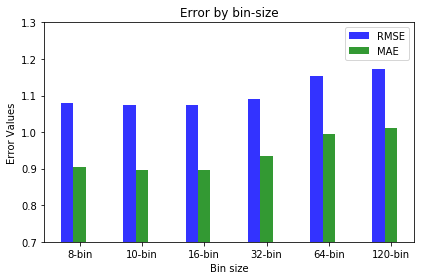

In [8]:
# data to plot
n_groups = 6


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, rmse_val, bar_width,alpha=opacity,color='b',label='RMSE')
 
rects2 = plt.bar(index + bar_width, mae_val, bar_width,alpha=opacity,color='g',label='MAE')
 
    
plt.xlabel('Bin size')
plt.ylabel('Error Values')
plt.title('Error by bin-size')
plt.xticks(index + bar_width, ('8-bin', '10-bin','16-bin','32-bin','64-bin','120-bin'))
plt.legend()
 
plt.tight_layout()

axes = plt.gca()
axes.set_ylim([0.70,1.3])

plt.show()

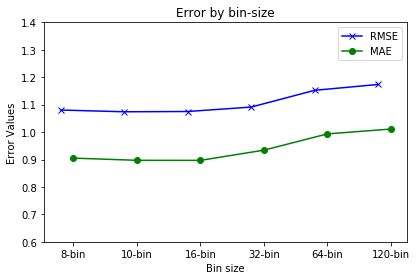

In [9]:
# LINE GRAPH



import numpy as np
import matplotlib.pyplot as plt
n_groups = 6


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.plot(index, rmse_val,color='b',label='RMSE',marker='x')
 
rects2 = plt.plot(index + bar_width, mae_val,color='g',label='MAE',marker='o')
 
    
plt.xlabel('Bin size')
plt.ylabel('Error Values')
plt.title('Error by bin-size')
plt.xticks(index + bar_width, ('8-bin', '10-bin','16-bin','32-bin','64-bin','120-bin'))
plt.legend()
 
plt.tight_layout()

axes = plt.gca()
axes.set_ylim([0.60,1.4])

plt.show()